In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as py
from scipy import stats
!pip install pmdarima
from pmdarima.utils import tsdisplay
from pmdarima.arima import auto_arima
!pip3 install arch
import arch.data.default
from arch.unitroot import ADF
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from datetime import date


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##Ativo 01

In [249]:
#ticket_01 = '^NDX'
#ticket_01 = '^VIX'
#ticket_01 = 'DOGE-USD'
ticket_01 = 'BTC-USD'
ticket_02 = '^NDX'
data_inicio = '2023-10-30'
data_fim    = pd.to_datetime("today").strftime('%Y-%m-%d')
dados_01 = yf.download(ticket_01, start=data_inicio, end=data_fim)
dados_02 = yf.download(ticket_02, start=data_inicio, end=data_fim )

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [250]:
dados_01['Return'] = np.log(dados_01['Adj Close'] / dados_01['Adj Close'].shift(1))
dados_01 = dados_01.dropna()
#tsdisplay(dados_01['Adj Close'])
#tsdisplay(dados_01['Return'])
dados_01.tail()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2023-11-25,37721.414062,37892.429688,37617.417969,37796.792969,37796.792969,9099571165,0.002026
2023-11-26,37796.828125,37820.300781,37162.750000,37479.121094,37479.121094,13744796068,-0.008440
2023-11-27,37454.191406,37559.355469,36750.128906,37254.167969,37254.167969,19002925720,-0.006020
2023-11-28,37247.992188,38368.480469,36891.089844,37831.085938,37831.085938,21696137014,0.015367
2023-11-29,37826.105469,38366.113281,37612.632812,37858.492188,37858.492188,20728546658,0.000724


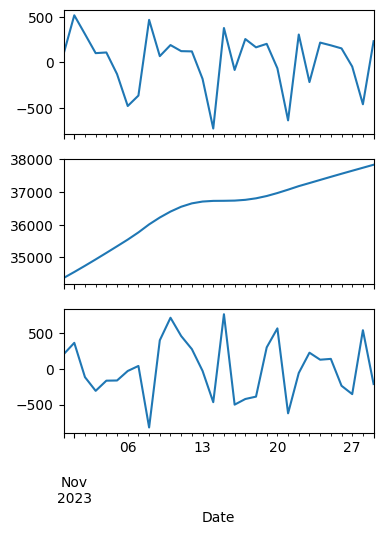

In [251]:
# Decmposição STL
dados_01 = dados_01.asfreq('D')
dados_01['Adj Close'] = dados_01['Adj Close'].interpolate()
stl_dados_01 = sm.tsa.STL(dados_01['Adj Close'])
stl_dados_01_res = stl_dados_01.fit()
fig, axes = py.subplots(nrows=3, sharex=True, figsize=(4, 5.5))
stl_dados_01_res.seasonal.plot(ax=axes[0])
stl_dados_01_res.trend.plot(ax=axes[1])
stl_dados_01_res.resid.plot(ax=axes[2])
#plot_seasonal_decomp(stl_dados_01_res.trend, stl_dados_01_res.seasonal, stl_dados_01_res.resid, "STL")
dados_01_ns = stl_dados_01_res.trend+stl_dados_01_res.resid

In [252]:
# Teste de Dickey-Fuller aumentado com drift+trend
adf_dados_01_trend = adfuller(dados_01['Adj Close'], regression='ct')
adf_dados_01_trend
print(f'ADF Statistic: {adf_dados_01_trend[0]}')
print(f'p-value: {adf_dados_01_trend[1]}')
for key, value in adf_dados_01_trend[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.51724627312338
p-value: 0.0014143890909025603
Critial Values:
   1%, -4.31024911353479
Critial Values:
   5%, -3.5744878842920986
Critial Values:
   10%, -3.221793310508836


In [254]:
# Vamos tomar a primeira diferença da série a analisar o resultado
dif_dados_01 = dados_01['Adj Close'].diff().dropna()
#tsdisplay(dif_dados_01)

In [255]:
# Teste de Dickey-Fuller aumentado com drift+trend
adf_dif_dados_01_trend = adfuller(dif_dados_01, regression='ct')
adf_dif_dados_01_trend
print(f'ADF Statistic: {adf_dif_dados_01_trend[0]}')
print(f'p-value: {adf_dif_dados_01_trend[1]}')
for key, value in adf_dif_dados_01_trend[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -5.3461014292517435
p-value: 4.6067079906644836e-05
Critial Values:
   1%, -4.339881664888482
Critial Values:
   5%, -3.5877977071584612
Critial Values:
   10%, -3.2293340725499164


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=457.115, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=458.999, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=460.381, Time=0.44 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=462.430, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=459.013, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=464.165, Time=0.40 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=460.247, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=460.391, Time=0.84 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=464.793, Time=0.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=462.324, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=464.151, Time=0.33 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] inte

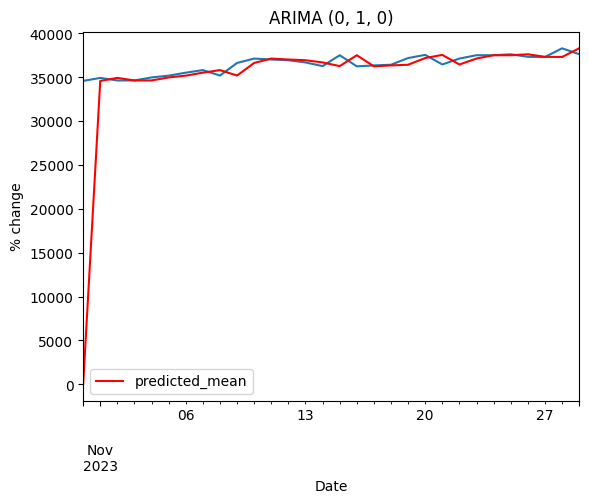

In [256]:
#Auto Arima
AUTO_ARIMA = auto_arima(dados_01_ns,
                       start_p=1, start_q=1,
                       max_p=3, max_q=3,
                       seasonal=False,
                       d=1,
                       trace=True,
                       error_action='trace',
                       suppress_warnings=True,
                       stepwise=False)

print(AUTO_ARIMA.params())

best_model = AUTO_ARIMA
best_order = best_model.order

# Melhor modelo ARIMA(best_order)
BEST_ARIMA_adf_dados_01_ns = ARIMA(dados_01_ns, order=(best_order))
res_BEST_ARIMA_adf_dados_01_ns = BEST_ARIMA_adf_dados_01_ns.fit()
print(res_BEST_ARIMA_adf_dados_01_ns.summary())
BEST_ARIMA_adf_dados_01_ns_predict = pd.DataFrame(res_BEST_ARIMA_adf_dados_01_ns.predict())
fig, ax = py.subplots(1, 1)
dados_01_ns.plot(ax=ax)
BEST_ARIMA_adf_dados_01_ns_predict.plot(ax=ax,color='red')
py.ylabel("% change"); py.title('ARIMA '+str(best_order));
py.show()

     lb_stat  lb_pvalue
10  0.081616        1.0


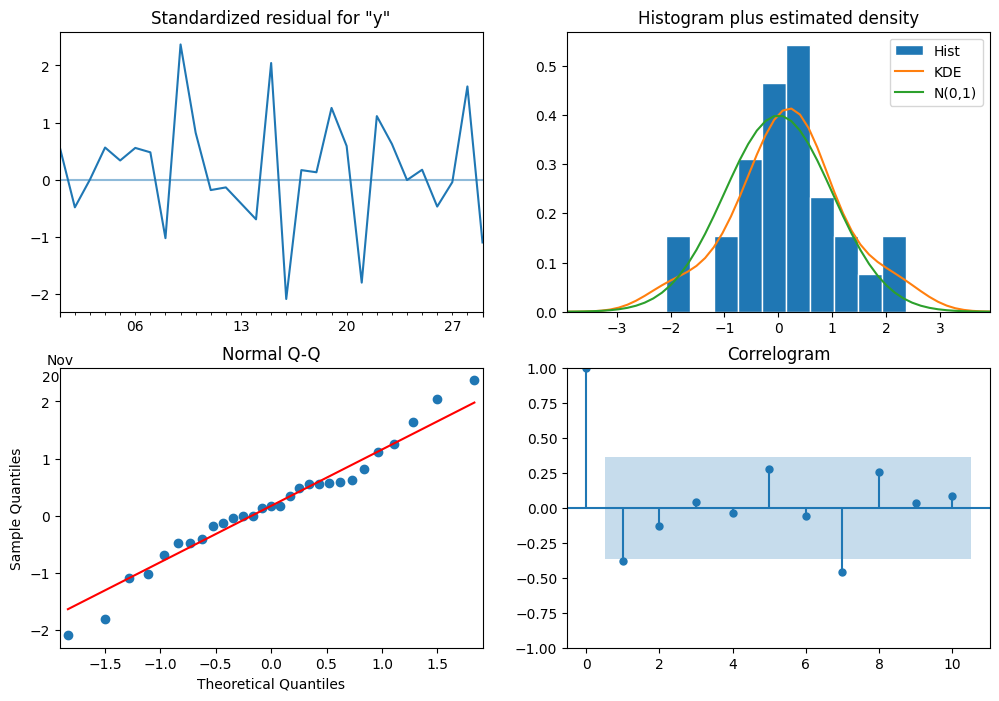

In [257]:
# Analise dos resíduos
AUX = acorr_ljungbox(res_BEST_ARIMA_adf_dados_01_ns.resid, lags=[10])
res_BEST_ARIMA_adf_dados_01_ns.plot_diagnostics(figsize=(12,8))
print(AUX)
py.show()

In [258]:
indice_10_frente_temp = pd.date_range(dados_01_ns.index[-1], freq="D", periods = 10+1) #Índice temporal para as previsões
indice_10_frente = indice_10_frente_temp[1:]
fcast_BEST_ARIMA_dados_01 = res_BEST_ARIMA_adf_dados_01_ns.get_forecast(10)
fcast_BEST_ARIMA_dados_01_mean = fcast_BEST_ARIMA_dados_01.summary_frame(alpha=0.05)['mean']
fcast_BEST_ARIMA_dados_01_low = fcast_BEST_ARIMA_dados_01.summary_frame(alpha=0.05)['mean_ci_lower']
fcast_BEST_ARIMA_dados_01_up = fcast_BEST_ARIMA_dados_01.summary_frame(alpha=0.05)['mean_ci_upper']
fcast_BEST_ARIMA_dados_01_mean = fcast_BEST_ARIMA_dados_01_mean.rename('ARIMA Forecast ' + str(best_order))

Forecast ARMA  (0, 1, 0) :
 y                   mean      mean_se  mean_ci_lower  mean_ci_upper
2023-11-30  37627.959938   606.689617   36438.870139   38817.049738
2023-12-01  37627.959938   857.988685   35946.333017   39309.586860
2023-12-02  37627.959938  1050.817242   35568.395990   39687.523886
2023-12-03  37627.959938  1213.379235   35249.780339   40006.139538
2023-12-04  37627.959938  1356.599226   34969.074315   40286.845562
2023-12-05  37627.959938  1486.079995   34715.296670   40540.623206
2023-12-06  37627.959938  1605.149851   34481.924042   40773.995835
2023-12-07  37627.959938  1715.977370   34264.706095   40991.213782
2023-12-08  37627.959938  1820.068852   34060.690539   41195.229338
2023-12-09  37627.959938  1918.521024   33867.727828   41388.192048 



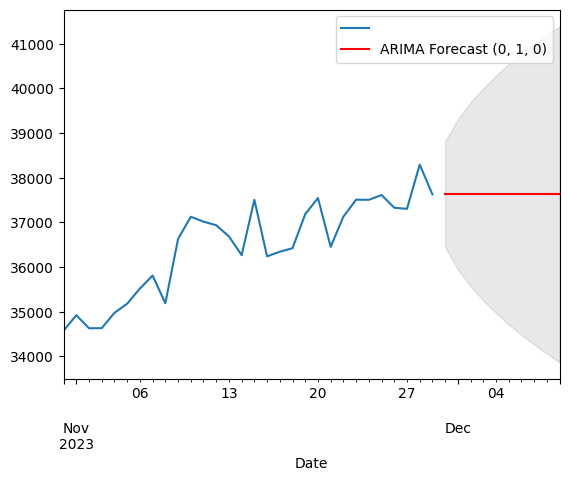

In [259]:
## Imprime as previsões
print(f'Forecast ARMA ',best_order, ':\n',fcast_BEST_ARIMA_dados_01.summary_frame(alpha=0.05),'\n')

## Gráfico das previsões
fig_, ax_ = py.subplots(1, 1)
dados_01_ns.plot(ax=ax_, legend=True)
fcast_BEST_ARIMA_dados_01_mean.plot(ax=ax_,color='red', legend=True)
ax_.fill_between(indice_10_frente, fcast_BEST_ARIMA_dados_01_low, fcast_BEST_ARIMA_dados_01_up, color='k',alpha=.09);
py.show()

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -62.7886
Distribution:                  Normal   AIC:                           133.577
Method:            Maximum Likelihood   BIC:                           139.182
                                        No. Observations:                   30
Date:                Fri, Dec 01 2023   Df Residuals:                       29
Time:                        03:57:30   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4226      0.540      0.783      0.433 [ -0.635,  1.48

Date
2023-11-26 00:00:00                                             -0.00844
2023-11-27 00:00:00                                             -0.00602
2023-11-28 00:00:00                                             0.015367
2023-11-29 00:00:00                                             0.000724
VolGARCH(1,1)          Date
2023-10-31    0.020487
2023-11-01    0.01...
Name: Return, dtype: object

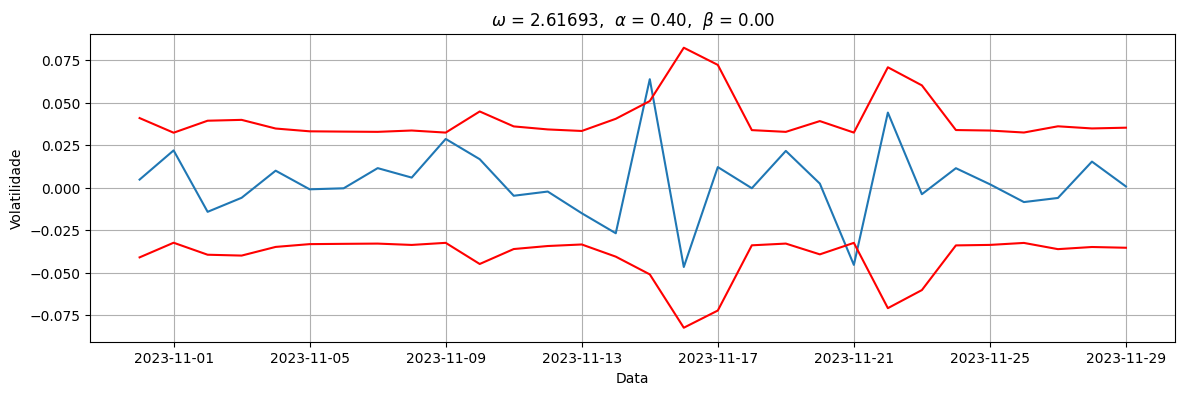

In [260]:
#GARCH (1,1)
from arch import arch_model

dados = dados_01['Return'].dropna()

garch_1_1 = arch_model(100*dados, p=1, q=1, mean='constant', vol='GARCH', dist='normal')
garch_1_1_results = garch_1_1.fit(update_freq=0, disp=False)


print(garch_1_1_results.summary())
alpha = garch_1_1_results.params['alpha[1]']
beta  = garch_1_1_results.params['beta[1]']
omega = garch_1_1_results.params['omega']
py.figure(figsize=(14, 4))
py.plot(dados, label='Retorno')
py.plot( 2*garch_1_1_results.conditional_volatility/100, 'r', label='$\pm 2\sigma$')
py.plot(-2*garch_1_1_results.conditional_volatility/100, 'r')

py.title('$\omega$ = {:.5f},  $\\alpha$ = {:.2f},  $\\beta$ = {:.2f}'.format(omega, alpha, beta))
py.grid(True)
py.xlabel('Data')
py.ylabel('Volatilidade')
dados['VolGARCH(1,1)'] = garch_1_1_results.conditional_volatility/100
print(dados['VolGARCH(1,1)'])
dados.tail()

In [261]:
dados.tail(100)

Date
2023-10-31 00:00:00                                             0.004783
2023-11-01 00:00:00                                             0.021953
2023-11-02 00:00:00                                            -0.014182
2023-11-03 00:00:00                                            -0.005911
2023-11-04 00:00:00                                             0.010023
2023-11-05 00:00:00                                            -0.000937
2023-11-06 00:00:00                                            -0.000342
2023-11-07 00:00:00                                             0.011526
2023-11-08 00:00:00                                             0.005956
2023-11-09 00:00:00                                             0.028692
2023-11-10 00:00:00                                             0.016778
2023-11-11 00:00:00                                            -0.004726
2023-11-12 00:00:00                                            -0.002252
2023-11-13 00:00:00                           

<bound method NDFrame.head of                    0
time                
2023-11-30  0.020945
2023-12-01  0.020945
2023-12-02  0.020945
2023-12-03  0.020945
2023-12-04  0.020945
...              ...
2024-06-12  0.020945
2024-06-13  0.020945
2024-06-14  0.020945
2024-06-15  0.020945
2024-06-16  0.020945

[200 rows x 1 columns]>


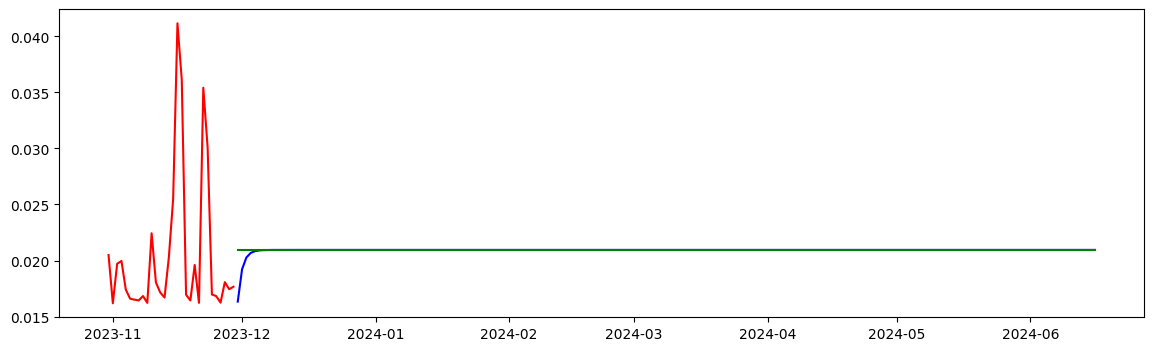

In [262]:
#GARCH(1,1)

vol_garch_1_1 = garch_1_1_results.conditional_volatility/100
forecast_garch_1_1 = garch_1_1_results.forecast(horizon=200, reindex=False)
garch_1_1_vol_forecast_np = np.sqrt(forecast_garch_1_1.variance.values)/100
garch_1_1_vol_forecast = pd.DataFrame(np.transpose(garch_1_1_vol_forecast_np))
py.figure(figsize=(14, 4))
py.plot( vol_garch_1_1, 'r')
idx_200_frente_temp = pd.date_range(vol_garch_1_1.index[-1], freq="D", periods = 200+1) #Índice temporal para as previsões
idx_200_frente = idx_200_frente_temp[1:]
garch_1_1_vol_forecast['time'] = idx_200_frente
garch_1_1_vol_forecast = garch_1_1_vol_forecast.set_index('time') #Cría índice temporal
py.plot(garch_1_1_vol_forecast, 'b')
alpha = garch_1_1_results.params['alpha[1]']
beta  = garch_1_1_results.params['beta[1]']
omega = garch_1_1_results.params['omega']
var_garch_1_1= omega/(1-(alpha + beta))
std_garch_1_1 = pd.DataFrame(np.repeat(np.sqrt(var_garch_1_1)/100,200))
std_garch_1_1['time'] = idx_200_frente
std_garch_1_1 = std_garch_1_1.set_index('time') #Cría índice temporal
py.plot(std_garch_1_1, 'g')
print(std_garch_1_1.head)

In [263]:
#######################################################################################################################################################################################################################################################

In [264]:
#######################################################################################################################################################################################################################################################

##Ativo 02

In [265]:
dados_02['Return'] = np.log(dados_02['Adj Close'] / dados_02['Adj Close'].shift(1))
dados_02 = dados_02.dropna()
#tsdisplay(dados_02['Adj Close'])
#tsdisplay(dados_02['Return'])
dados_02.tail()


,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2023-11-24,15974.849609,16007.429688,15940.620117,15982.009766,15982.009766,2541840000,-0.001212
2023-11-27,15969.719727,16045.299805,15932.190430,15961.980469,15961.980469,4205880000,-0.001254
2023-11-28,15940.290039,16031.519531,15921.070312,16010.429688,16010.429688,4474400000,0.003031
2023-11-29,16111.360352,16166.509766,15976.690430,15987.599609,15987.599609,4890220000,-0.001427
2023-11-30,15987.660156,16013.480469,15825.669922,15947.870117,15947.870117,5678070000,-0.002488


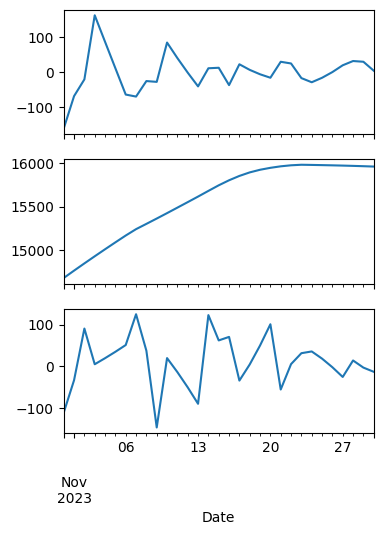

In [266]:
# Decmposição STL
dados_02 = dados_02.asfreq('D')
dados_02['Adj Close'] = dados_02['Adj Close'].interpolate()
stl_dados_02 = sm.tsa.STL(dados_02['Adj Close'])
stl_dados_02_res = stl_dados_02.fit()
fig, axes = py.subplots(nrows=3, sharex=True, figsize=(4, 5.5))
stl_dados_02_res.seasonal.plot(ax=axes[0])
stl_dados_02_res.trend.plot(ax=axes[1])
stl_dados_02_res.resid.plot(ax=axes[2])
#plot_seasonal_decomp(stl_dados_02_res.trend, stl_dados_02_res.seasonal, stl_dados_02_res.resid, "STL")
dados_02_ns = stl_dados_02_res.trend+stl_dados_02_res.resid

In [267]:
# Teste de Dickey-Fuller aumentado com drift+trend
adf_dados_02_trend = adfuller(dados_02['Adj Close'], regression='ct')
adf_dados_02_trend
print(f'ADF Statistic: {adf_dados_02_trend[0]}')
print(f'p-value: {adf_dados_02_trend[1]}')
for key, value in adf_dados_02_trend[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.2543498655411542
p-value: 0.9905048140686601
Critial Values:
   1%, -4.417148310183283
Critial Values:
   5%, -3.6221875096572695
Critial Values:
   10%, -3.248726452699926


In [269]:
# Vamos tomar a primeira diferença da série a analisar o resultado
dif_dados_02 = dados_02['Adj Close'].diff().dropna()
#tsdisplay(dif_dados_02)

In [270]:
# Teste de Dickey-Fuller aumentado com drift+trend
adf_dif_dados_02_trend = adfuller(dif_dados_02, regression='ct')
adf_dif_dados_02_trend
print(f'ADF Statistic: {adf_dif_dados_02_trend[0]}')
print(f'p-value: {adf_dif_dados_02_trend[1]}')
for key, value in adf_dif_dados_02_trend[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -5.928571762850881
p-value: 3.0998499823568793e-06
Critial Values:
   1%, -4.339881664888482
Critial Values:
   5%, -3.5877977071584612
Critial Values:
   10%, -3.2293340725499164


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=360.650, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=362.625, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=364.614, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=366.577, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=362.624, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=364.629, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=364.594, Time=0.50 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=365.061, Time=0.57 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=364.606, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=366.606, Time=0.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=367.019, Time=0.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=366.605, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=366.479, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec

Best model:  ARIMA(0,1,0)(0,0,0)

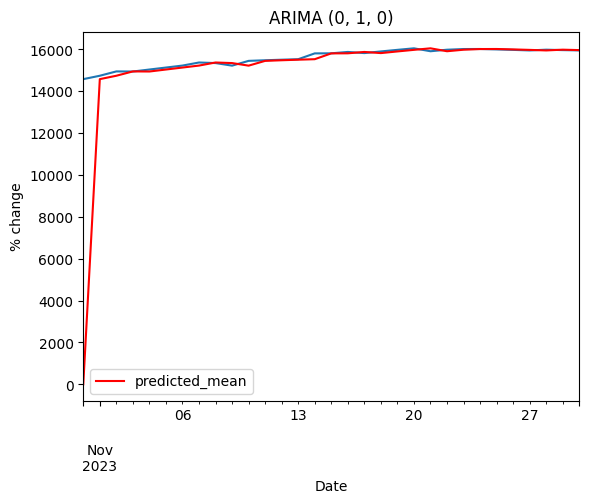

In [271]:
#Auto Arima
AUTO_ARIMA_02 = auto_arima(dados_02_ns,
                       start_p=1, start_q=1,
                       max_p=3, max_q=3,
                       seasonal=False,
                       d=1,
                       trace=True,
                       error_action='trace',
                       suppress_warnings=True,
                       stepwise=False)

print(AUTO_ARIMA_02.params())

best_model_02 = AUTO_ARIMA_02
best_order_02 = best_model_02.order

# Melhor modelo ARIMA(best_order_02)
BEST_ARIMA_adf_dados_02_ns = ARIMA(dados_02_ns, order=(best_order_02))
res_BEST_ARIMA_adf_dados_02_ns = BEST_ARIMA_adf_dados_02_ns.fit()
print(res_BEST_ARIMA_adf_dados_02_ns.summary())
BEST_ARIMA_adf_dados_02_ns_predict = pd.DataFrame(res_BEST_ARIMA_adf_dados_02_ns.predict())
fig, ax = py.subplots(1, 1)
dados_02_ns.plot(ax=ax)
BEST_ARIMA_adf_dados_02_ns_predict.plot(ax=ax,color='red')
py.ylabel("% change"); py.title('ARIMA '+str(best_order_02));
py.show()

     lb_stat  lb_pvalue
10  0.035822        1.0


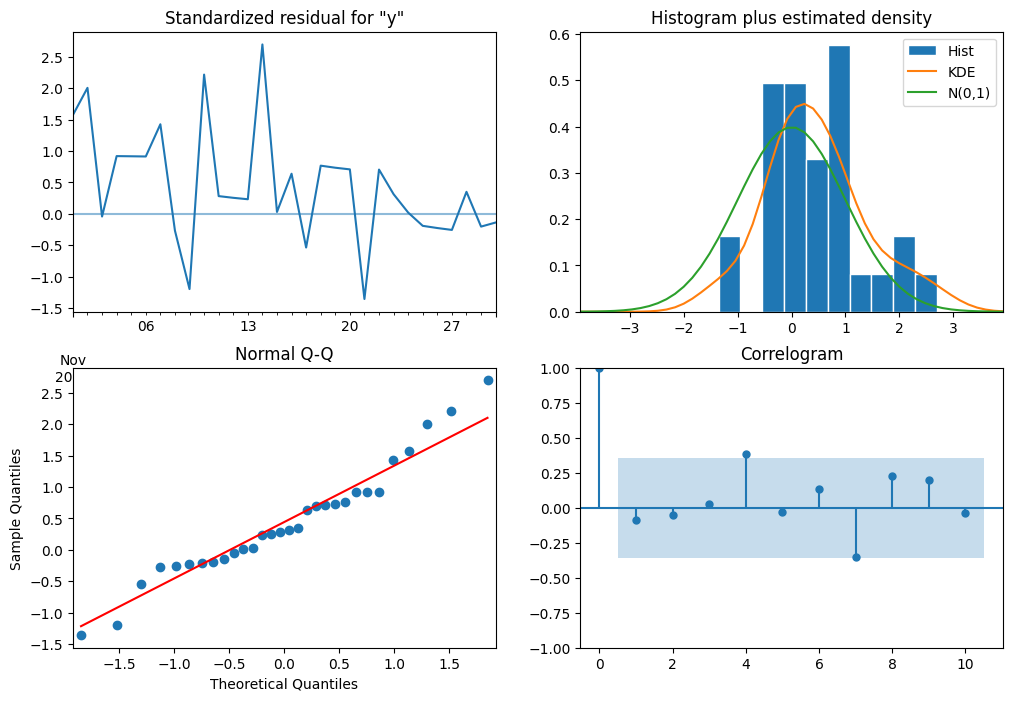

In [272]:
# Analise dos resíduos
AUX = acorr_ljungbox(res_BEST_ARIMA_adf_dados_02_ns.resid, lags=[10])
res_BEST_ARIMA_adf_dados_02_ns.plot_diagnostics(figsize=(12,8))
print(AUX)
py.show()

In [273]:
indice_10_frente_temp_02 = pd.date_range(dados_02_ns.index[-1], freq="D", periods = 10+1) #Índice temporal para as previsões
indice_10_frente_02 = indice_10_frente_temp_02[1:]
fcast_BEST_ARIMA_dados_02 = res_BEST_ARIMA_adf_dados_02_ns.get_forecast(10)
fcast_BEST_ARIMA_dados_02_mean = fcast_BEST_ARIMA_dados_02.summary_frame(alpha=0.05)['mean']
fcast_BEST_ARIMA_dados_02_low = fcast_BEST_ARIMA_dados_02.summary_frame(alpha=0.05)['mean_ci_lower']
fcast_BEST_ARIMA_dados_02_up = fcast_BEST_ARIMA_dados_02.summary_frame(alpha=0.05)['mean_ci_upper']
fcast_BEST_ARIMA_dados_02_mean = fcast_BEST_ARIMA_dados_02_mean.rename('ARIMA Forecast ' + str(best_order))

Forecast ARMA  (0, 1, 0) :
 y                   mean     mean_se  mean_ci_lower  mean_ci_upper
2023-12-01  15944.333047  102.995066   15742.466427   16146.199668
2023-12-02  15944.333047  145.657020   15658.850535   16229.815560
2023-12-03  15944.333047  178.392688   15594.689804   16293.976290
2023-12-04  15944.333047  205.990133   15540.599806   16348.066288
2023-12-05  15944.333047  230.303970   15492.945561   16395.720533
2023-12-06  15944.333047  252.285359   15449.862831   16438.803264
2023-12-07  15944.333047  272.499332   15410.244171   16478.421923
2023-12-08  15944.333047  291.314039   15373.368022   16515.298072
2023-12-09  15944.333047  308.985199   15338.733186   16549.932909
2023-12-10  15944.333047  325.698997   15305.974743   16582.691352 



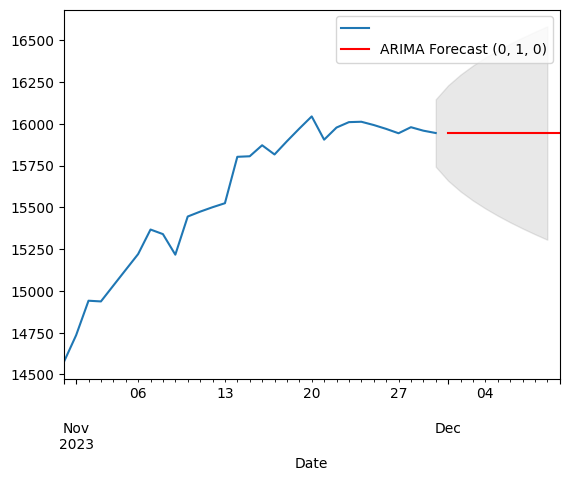

In [274]:
## Imprime as previsões
print(f'Forecast ARMA ',best_order, ':\n',fcast_BEST_ARIMA_dados_02.summary_frame(alpha=0.05),'\n')

## Gráfico das previsões
fig_, ax_ = py.subplots(1, 1)
dados_02_ns.plot(ax=ax_, legend=True)
fcast_BEST_ARIMA_dados_02_mean.plot(ax=ax_,color='red', legend=True)
ax_.fill_between(indice_10_frente, fcast_BEST_ARIMA_dados_02_low, fcast_BEST_ARIMA_dados_02_up, color='k',alpha=.09);
py.show()

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -27.4004
Distribution:                  Normal   AIC:                           62.8007
Method:            Maximum Likelihood   BIC:                           67.1649
                                        No. Observations:                   22
Date:                Fri, Dec 01 2023   Df Residuals:                       21
Time:                        03:57:46   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.4726      0.189      2.503  1.232e-02 [  0.103,  0.84

<bound method NDFrame.head of Date
2023-10-31    0.008660
2023-11-01    0.007558
2023-11-02    0.009523
2023-11-03    0.009705
2023-11-06    0.008477
2023-11-07    0.007538
2023-11-08    0.007664
2023-11-09    0.007573
2023-11-10    0.009562
2023-11-13    0.011295
2023-11-14    0.008872
2023-11-15    0.010813
2023-11-16    0.008255
2023-11-17    0.007684
2023-11-20    0.007672
2023-11-21    0.008112
2023-11-22    0.008967
2023-11-24    0.007615
2023-11-27    0.007885
2023-11-28    0.007934
2023-11-29    0.007469
2023-11-30    0.007899
Name: cond_vol, dtype: float64>

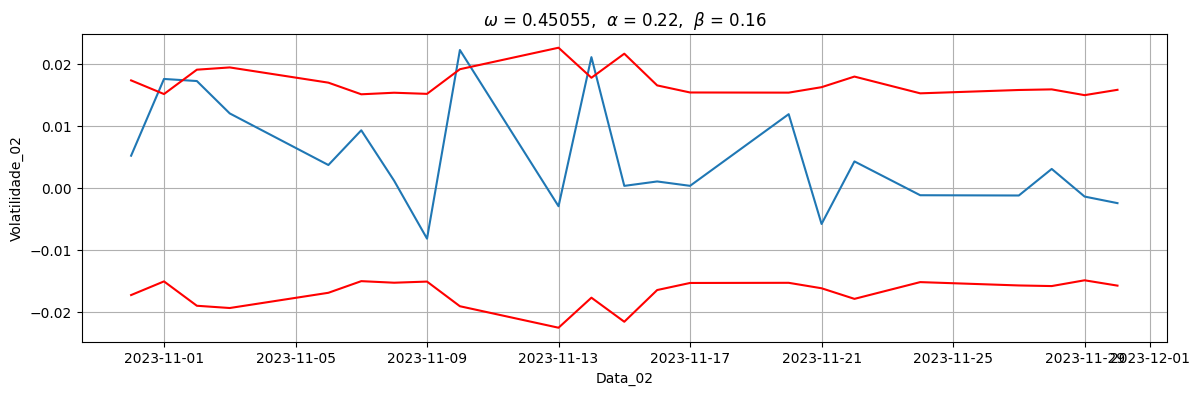

In [275]:
#GARCH (1,1)
from arch import arch_model

dados_02_2 = dados_02['Return'].dropna()
garch_1_1_02 = arch_model(100*dados_02_2, p=1, q=1, mean='constant', vol='GARCH', dist='normal')
garch_1_1_results_02 = garch_1_1_02.fit(update_freq=0, disp=False)


print(garch_1_1_results_02.summary())
alpha_02 = garch_1_1_results_02.params['alpha[1]']
beta_02  = garch_1_1_results_02.params['beta[1]']
omega_02 = garch_1_1_results_02.params['omega']
py.figure(figsize=(14, 4))
py.plot(dados_02_2, label='Retorno')
py.plot( 2*garch_1_1_results_02.conditional_volatility/100, 'r', label='$\pm 2\sigma$')
py.plot(-2*garch_1_1_results_02.conditional_volatility/100, 'r')

py.title('$\omega$ = {:.5f},  $\\alpha$ = {:.2f},  $\\beta$ = {:.2f}'.format(omega_02, alpha_02, beta_02))
py.grid(True)
py.xlabel('Data_02')
py.ylabel('Volatilidade_02')
dados_02_2['VolGARCH(1,1)_02'] = garch_1_1_results_02.conditional_volatility/100
dados_02_2['VolGARCH(1,1)_02'].head

<bound method NDFrame.head of                    0
time                
2023-12-01  0.008691
2023-12-02  0.008691
2023-12-03  0.008691
2023-12-04  0.008691
2023-12-05  0.008691
...              ...
2024-03-05  0.008691
2024-03-06  0.008691
2024-03-07  0.008691
2024-03-08  0.008691
2024-03-09  0.008691

[100 rows x 1 columns]>


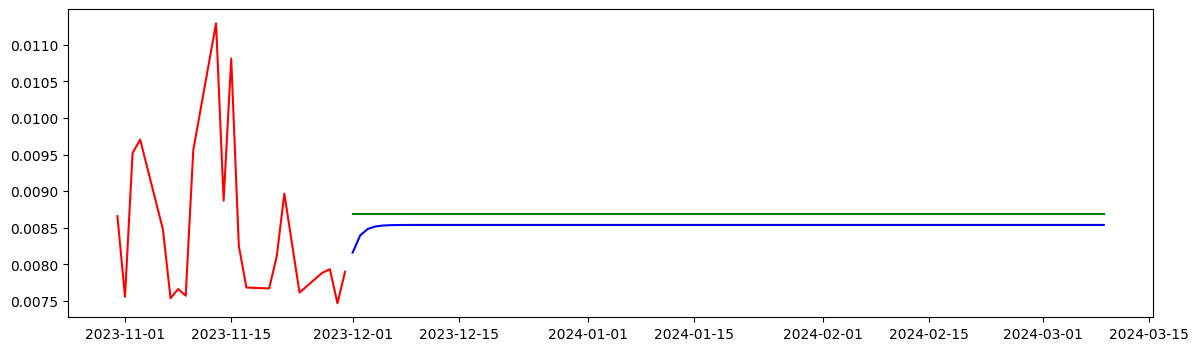

In [276]:
#GARCH(1,1)

vol_garch_1_1_02 = garch_1_1_results_02.conditional_volatility/100
forecast_garch_1_1_02 = garch_1_1_results_02.forecast(horizon=100, reindex=False)
garch_1_1_vol_forecast_np_02 = np.sqrt(forecast_garch_1_1_02.variance.values)/100
garch_1_1_vol_forecast_02 = pd.DataFrame(np.transpose(garch_1_1_vol_forecast_np_02))
py.figure(figsize=(14, 4))
py.plot( vol_garch_1_1_02, 'r')
idx_frente_temp_02 = pd.date_range(vol_garch_1_1_02.index[-1], freq="D", periods = 100+1) #Índice temporal para as previsões
idx_frente_02 = idx_frente_temp_02[1:]
garch_1_1_vol_forecast_02['time'] = idx_frente_02
garch_1_1_vol_forecast_02 = garch_1_1_vol_forecast_02.set_index('time') #Cría índice temporal
py.plot(garch_1_1_vol_forecast_02, 'b')
alpha_02 = garch_1_1_results_02.params['alpha[1]']
beta_02  = garch_1_1_results_02.params['beta[1]']
omega_02 = garch_1_1_results_02.params['omega']
var_garch_1_1_02= omega_02/(1-(alpha + beta))
std_garch_1_1_02 = pd.DataFrame(np.repeat(np.sqrt(var_garch_1_1_02)/100,100))
std_garch_1_1_02['time'] = idx_frente_02
std_garch_1_1_02 = std_garch_1_1_02.set_index('time') #Cría índice temporal
py.plot(std_garch_1_1_02, 'g')
print(std_garch_1_1_02.head)

In [277]:
#######################################################################################################################################################################################################################################################

In [278]:
#######################################################################################################################################################################################################################################################

##Correlação

In [279]:
#Regressão Linear
# Merge on dates to ensure alignment
merged_data = pd.merge(dados_01, dados_02, on='Date', how='inner')
merged_data.dropna()

retorno_01 = merged_data['Return_x'].reset_index(drop=True)
retorno_02 = merged_data['Return_y'].reset_index(drop=True)

retorno_01 = retorno_01.fillna(retorno_01.mean())
retorno_02 = retorno_02.fillna(retorno_02.mean())

# Regression model
x = sm.add_constant(retorno_01)
modelo = sm.OLS(retorno_02, x)
resultado = modelo.fit()
print(resultado.summary())
print(f"Intercepto = ", resultado.params[0],", Coeficiente = ", resultado.params[1])

                            OLS Regression Results                            
Dep. Variable:               Return_y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                   0.01098
Date:                Fri, 01 Dec 2023   Prob (F-statistic):              0.917
Time:                        03:57:47   Log-Likelihood:                 105.68
No. Observations:                  30   AIC:                            -207.4
Df Residuals:                      28   BIC:                            -204.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0052      0.001      3.824      0.0

In [280]:
#Volatilidade
Vol_01 = dados['VolGARCH(1,1)']
Vol_02 = dados_02_2['VolGARCH(1,1)_02']

In [281]:
# Mapeando os índices numéricos para datas (ajuste conforme necessário)
data_inicial = data_inicio
indices = pd.date_range(data_inicial, periods=len(retorno_01), freq='D')
retorno_01.index = indices
retorno_02.index = indices

# Agora, tente novamente alinhar e calcular a correlação
data_combinada = pd.concat([retorno_01, retorno_02, Vol_01, Vol_02], axis=1, join='inner').dropna()
print(f"Quantidade de dados disponíveis após alinhamento: {data_combinada.dropna().shape[0]}")

# Separa as séries alinhadas
retorno_01_alinhado = data_combinada.iloc[:, 0]
retorno_02_alinhado = data_combinada.iloc[:, 1]
vol_01_alinhada = data_combinada.iloc[:, 2]
vol_02_alinhada = data_combinada.iloc[:, 3]

# Calcula a covariância dos retornos
cov_mat = np.cov(retorno_01_alinhado, retorno_02_alinhado)

# Calcula a correlação usando as volatilidades GARCH
correlacao = cov_mat[0, 1] / (vol_01_alinhada.mean() * vol_02_alinhada.mean())
print(correlacao)


Quantidade de dados disponíveis após alinhamento: 20
-0.07599818488227068
